<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/Notebooks/MODULO%205/PerceptonMultiplica/DatosCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [2]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
url2 ="https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv"
url3 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv"
url4 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/O3_mensual.csv"
url5 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/NO2_mensual.csv"
df = pd.read_csv(url,usecols=[1])
df2 = pd.read_csv(url,usecols=[2])
df3 = pd.read_csv(url,usecols=[3])
df4 = pd.read_csv(url,usecols=[4])
df5 = pd.read_csv(url,usecols=[5])

In [3]:
df = df.values
df = df.astype('float32')
df2 = df2.values
df2 = df2.astype('float32')
df3 = df3.values
df3 = df3.astype('float32')
df4 = df4.values
df4 = df4.astype('float32')
df5 = df5.values
df5 = df5.astype('float32')

In [4]:
train_size = int(len(df)*.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

128 64


In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [6]:
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
52/52 - 22s - loss: 17.9496
Epoch 2/800
52/52 - 0s - loss: 2.7279
Epoch 3/800
52/52 - 0s - loss: 2.4700
Epoch 4/800
52/52 - 0s - loss: 2.1467
Epoch 5/800
52/52 - 0s - loss: 2.2069
Epoch 6/800
52/52 - 0s - loss: 1.8150
Epoch 7/800
52/52 - 0s - loss: 1.6280
Epoch 8/800
52/52 - 0s - loss: 1.5860
Epoch 9/800
52/52 - 0s - loss: 1.5989
Epoch 10/800
52/52 - 0s - loss: 1.4688
Epoch 11/800
52/52 - 0s - loss: 1.7200
Epoch 12/800
52/52 - 0s - loss: 1.5237
Epoch 13/800
52/52 - 0s - loss: 1.9606
Epoch 14/800
52/52 - 0s - loss: 1.4747
Epoch 15/800
52/52 - 0s - loss: 1.3667
Epoch 16/800
52/52 - 0s - loss: 1.3383
Epoch 17/800
52/52 - 0s - loss: 1.4374
Epoch 18/800
52/52 - 0s - loss: 1.4298
Epoch 19/800
52/52 - 0s - loss: 1.3244
Epoch 20/800
52/52 - 0s - loss: 1.2397
Epoch 21/800
52/52 - 0s - loss: 1.3334
Epoch 22/800
52/52 - 0s - loss: 1.2291
Epoch 23/800
52/52 - 0s - loss: 1.2992
Epoch 24/800
52/52 - 0s - loss: 1.2981
Epoch 25/800
52/52 - 0s - loss: 1.2131
Epoch 26/800
52/52 - 0s - loss: 

In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 0.11 MSE (0.33 RMSE)
Resultado del test: 2.51 MSE (1.59 RMSE)


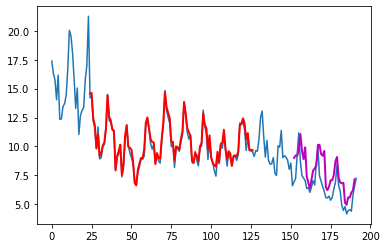

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 12.2920
Epoch 2/800
52/52 - 0s - loss: 2.5136
Epoch 3/800
52/52 - 0s - loss: 2.4627
Epoch 4/800
52/52 - 0s - loss: 2.4397
Epoch 5/800
52/52 - 0s - loss: 2.4422
Epoch 6/800
52/52 - 0s - loss: 2.3077
Epoch 7/800
52/52 - 0s - loss: 2.2245
Epoch 8/800
52/52 - 0s - loss: 2.1530
Epoch 9/800
52/52 - 0s - loss: 2.0678
Epoch 10/800
52/52 - 0s - loss: 2.0380
Epoch 11/800
52/52 - 0s - loss: 2.0151
Epoch 12/800
52/52 - 0s - loss: 2.3576
Epoch 13/800
52/52 - 0s - loss: 2.0177
Epoch 14/800
52/52 - 0s - loss: 1.8913
Epoch 15/800
52/52 - 0s - loss: 1.9020
Epoch 16/800
52/52 - 0s - loss: 1.9948
Epoch 17/800
52/52 - 0s - loss: 1.8536
Epoch 18/800
52/52 - 0s - loss: 2.1976
Epoch 19/800
52/52 - 0s - loss: 1.9144
Epoch 20/800
52/52 - 0s - loss: 1.7398
Epoch 21/800
52/52 - 0s - loss: 1.9510
Epoch 22/800
52/52 - 0s - loss: 1.8049
Epoch 23/800
52/52 - 0s - loss: 1.6294
Epoch 24/800
52/52 - 0s - loss: 1.9489
Epoch 25/800
52/52 - 0s - loss: 1.7431
Epoch 26/800
52/52 - 0s - 

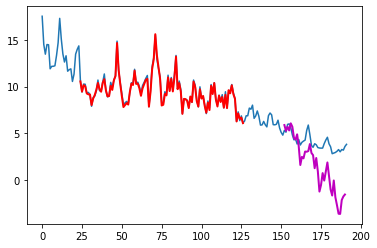

In [10]:
train_size = int(len(df2)*.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:],df2[train_size:len(df2),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df2)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 27.1097
Epoch 2/800
52/52 - 0s - loss: 5.2789
Epoch 3/800
52/52 - 0s - loss: 5.2986
Epoch 4/800
52/52 - 0s - loss: 4.9148
Epoch 5/800
52/52 - 0s - loss: 4.6416
Epoch 6/800
52/52 - 0s - loss: 4.3832
Epoch 7/800
52/52 - 0s - loss: 3.9190
Epoch 8/800
52/52 - 0s - loss: 3.6058
Epoch 9/800
52/52 - 0s - loss: 3.9680
Epoch 10/800
52/52 - 0s - loss: 3.1543
Epoch 11/800
52/52 - 0s - loss: 3.0359
Epoch 12/800
52/52 - 0s - loss: 3.9361
Epoch 13/800
52/52 - 0s - loss: 3.0346
Epoch 14/800
52/52 - 0s - loss: 3.2815
Epoch 15/800
52/52 - 0s - loss: 3.0107
Epoch 16/800
52/52 - 0s - loss: 2.7849
Epoch 17/800
52/52 - 0s - loss: 3.3637
Epoch 18/800
52/52 - 0s - loss: 2.5237
Epoch 19/800
52/52 - 0s - loss: 2.5855
Epoch 20/800
52/52 - 0s - loss: 2.4187
Epoch 21/800
52/52 - 0s - loss: 2.9268
Epoch 22/800
52/52 - 0s - loss: 2.5948
Epoch 23/800
52/52 - 0s - loss: 2.6326
Epoch 24/800
52/52 - 0s - loss: 2.4640
Epoch 25/800
52/52 - 0s - loss: 2.6402
Epoch 26/800
52/52 - 0s - 

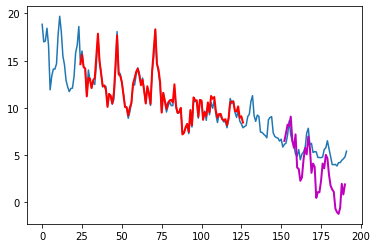

In [11]:
train_size = int(len(df3)*.67)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:],df3[train_size:len(df3),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df3)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df3)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 39.1643
Epoch 2/800
52/52 - 0s - loss: 7.6672
Epoch 3/800
52/52 - 0s - loss: 7.1899
Epoch 4/800
52/52 - 0s - loss: 6.3588
Epoch 5/800
52/52 - 0s - loss: 6.4262
Epoch 6/800
52/52 - 0s - loss: 5.7904
Epoch 7/800
52/52 - 0s - loss: 5.1152
Epoch 8/800
52/52 - 0s - loss: 4.7530
Epoch 9/800
52/52 - 0s - loss: 4.5198
Epoch 10/800
52/52 - 0s - loss: 4.3311
Epoch 11/800
52/52 - 0s - loss: 4.6199
Epoch 12/800
52/52 - 0s - loss: 4.5324
Epoch 13/800
52/52 - 0s - loss: 3.8052
Epoch 14/800
52/52 - 0s - loss: 3.4314
Epoch 15/800
52/52 - 0s - loss: 3.7283
Epoch 16/800
52/52 - 0s - loss: 3.6853
Epoch 17/800
52/52 - 0s - loss: 3.1139
Epoch 18/800
52/52 - 0s - loss: 2.8157
Epoch 19/800
52/52 - 0s - loss: 2.9123
Epoch 20/800
52/52 - 0s - loss: 2.6683
Epoch 21/800
52/52 - 0s - loss: 2.9665
Epoch 22/800
52/52 - 0s - loss: 2.5383
Epoch 23/800
52/52 - 0s - loss: 3.6352
Epoch 24/800
52/52 - 0s - loss: 2.8913
Epoch 25/800
52/52 - 0s - loss: 2.9202
Epoch 26/800
52/52 - 0s - 

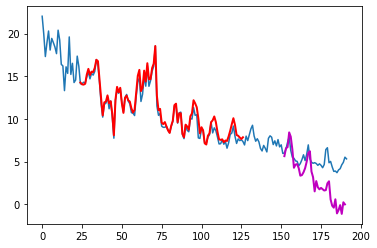

In [12]:
train_size = int(len(df4)*.67)
test_size = len(df4) - train_size
train, test = df4[0:train_size,:],df4[train_size:len(df4),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df4)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df4)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 20.0588
Epoch 2/800
52/52 - 0s - loss: 4.5641
Epoch 3/800
52/52 - 0s - loss: 4.4397
Epoch 4/800
52/52 - 0s - loss: 4.0572
Epoch 5/800
52/52 - 0s - loss: 3.4553
Epoch 6/800
52/52 - 0s - loss: 3.0578
Epoch 7/800
52/52 - 0s - loss: 3.0156
Epoch 8/800
52/52 - 0s - loss: 2.9216
Epoch 9/800
52/52 - 0s - loss: 2.8863
Epoch 10/800
52/52 - 0s - loss: 2.3634
Epoch 11/800
52/52 - 0s - loss: 2.2510
Epoch 12/800
52/52 - 0s - loss: 2.8616
Epoch 13/800
52/52 - 0s - loss: 2.2536
Epoch 14/800
52/52 - 0s - loss: 2.1564
Epoch 15/800
52/52 - 0s - loss: 2.1354
Epoch 16/800
52/52 - 0s - loss: 1.7995
Epoch 17/800
52/52 - 0s - loss: 1.9188
Epoch 18/800
52/52 - 0s - loss: 1.6206
Epoch 19/800
52/52 - 0s - loss: 1.7114
Epoch 20/800
52/52 - 0s - loss: 1.7120
Epoch 21/800
52/52 - 0s - loss: 2.1161
Epoch 22/800
52/52 - 0s - loss: 1.9476
Epoch 23/800
52/52 - 0s - loss: 1.5278
Epoch 24/800
52/52 - 0s - loss: 1.5926
Epoch 25/800
52/52 - 0s - loss: 1.7476
Epoch 26/800
52/52 - 0s - 

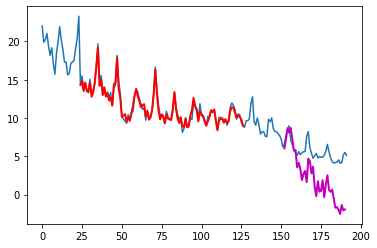

In [13]:
train_size = int(len(df5)*.67)
test_size = len(df5) - train_size
train, test = df5[0:train_size,:],df5[train_size:len(df5),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df5)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df5)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df5)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df5)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()